## Exercise 4: Iterative solution to the 2D Schödinger equation
**Aim**: Extend the iterative approach to 2D

**Suggestion**: Adapt the 1D class and modify necessary functions accordingly

In [1]:
# import modules
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
import sys
import time

%matplotlib inline

In [2]:
class scheodinger_2D(object):
    def __init__(self, nmesh=100, xLength=10., natoms=1, Vscale=20., 
                 alpha=0.095, method='const', record_psi_trials=False):
        self.nmesh = nmesh
        self.xLength = xLength
        self.natoms = natoms
        self.alpha = alpha
        self.Vscale = Vscale
        self.mesh, self.dx = np.linspace(0., self.xLength, self.nmesh, 
                                         endpoint=False, retstep=True)
        self.xmesh, self.ymesh = np.meshgrid(self.mesh, self.mesh)
        self.psi_list = []
        self.psi_trial_list = []
        self.method = method
        self.record_psi_trials = record_psi_trials
        
        
    def initialize_psi(self, method='random'):
        if self.method=='random':
            psi = self.normalize(np.random.rand(self.xmesh.shape))
            return psi
        if self.method=='const':
            psi = self.normalize(np.ones(self.xmesh.shape))
            return psi
        
    def get_potential(self):
        return -Vscale * \
                (np.cos(2*np.pi*self.xmesh/(self.xLength/self.natoms)) - 1.)/2. * \
                (np.cos(2*np.pi*self.ymesh/(self.xLength/self.natoms)) - 1.)/2.
    
    def get_laplacian(self, psi):
        return (np.roll(psi,-1,axis=0) - 2*psi + np.roll(psi,1,axis=0) + \
                np.roll(psi,-1,axis=1) - 2*psi + np.roll(psi,1,axis=1))/self.dx**2
        
    def get_hamilton(self, psi):
        return -0.5 * self.get_laplacian(psi)+self.get_potential()*psi
    
    def get_energy(self, psi):
        return self.dot(psi,self.get_hamilton(psi))
    
    def get_residual(self, psi):
        return self.orthogonalize(self.get_hamilton(psi) - 
                                  self.get_energy(psi)*psi)
    
    def get_next_psi(self, psi):
        residual = self.get_residual(psi)
        newpsi = self.orthogonalize(psi - self.alpha*residual)
        return self.normalize(newpsi), residual
        
    def get_state(self, max_steps=100000, max_error=1e-10):
        psi=self.initialize_psi()
        intermed_energy = []
        psi_trial = []
        
        for ii in xrange(max_steps):
            psi, residual = self.get_next_psi(psi)
            energy = self.get_energy(psi)
            intermed_energy.append(energy)
            
            if lg.norm(residual) <= max_error:
                print('reached convergence at step {}, error={:e}'.format(ii, lg.norm(residual)))
                if self.record_psi_trials:
                    self.psi_trial_list.append(psi_trial)
                return psi, energy, intermed_energy            
            
            if self.record_psi_trials:
                psi_trial.append(psi)
                
        if self.record_psi_trials:
            self.psi_trial_list.append(psi_trial)
        
        print('Failed to reach convergence. Error = {:e}'.format(lg.norm(residual)))
        return psi, energy, intermed_energy
        
    def orthogonalize(self, psi):
        for psi_j in self.psi_list:
            psi -= self.dot(psi, psi_j)*psi_j
        return psi
        
    def normalize(self, psi):
        return psi / lg.norm(psi)
    
    def get_nstates(self, nstates=1, max_steps=100000, max_error=1e-10):
        self.psi = []
        self.energy_list = []
        self.intermed_energy_list = []
        for ii in xrange(nstates):
            psi, energy, intermed_energy = self.get_state(max_steps=max_steps, max_error=max_error)
            self.psi_list.append(psi)
            self.energy_list.append(energy)
            self.intermed_energy_list.append(intermed_energy)
        return
    
    def dot(self, a, b):
        return np.sum(a * b)

### (1) Extend all 1D vectors to 2D.

### (2) Extend the following routines to 2D: `get_laplacian`, `normalize`, `dot_product`

### (3) Plot the 2D-wavefunctions.

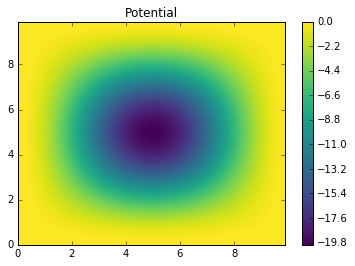

In [10]:
# define parameters
nmesh = 100
xLength = 10.
natoms = 1
Vscale = 20

plt.figure()
ham2d = scheodinger_2D(nmesh=nmesh, xLength=xLength, natoms=natoms, Vscale=Vscale)
hf = plt.contourf(ham2d.xmesh, ham2d.ymesh, ham2d.get_potential(), 100, cmap='viridis')
plt.colorbar(hf)
plt.title('Potential')

reached convergence at step 344, error=9.781481e-06
reached convergence at step 371, error=9.894471e-06
reached convergence at step 843, error=9.551782e-06
reached convergence at step 1032, error=9.650405e-06
Failed to reach convergence. Error = 1.667508e-03
reached convergence at step 1253, error=9.802788e-06
reached convergence at step 9652, error=9.992760e-06
Failed to reach convergence. Error = 5.541540e-04


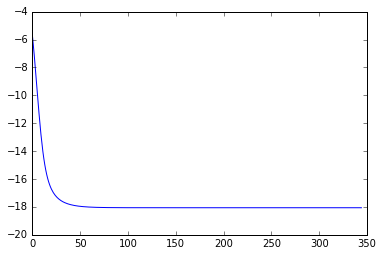

In [5]:
ham2d = scheodinger_2D(nmesh=50, xLength=xLength, natoms=natoms, Vscale=Vscale, alpha=0.01)
ham2d.get_nstates(nstates=8, max_steps=10000, max_error=1e-5)

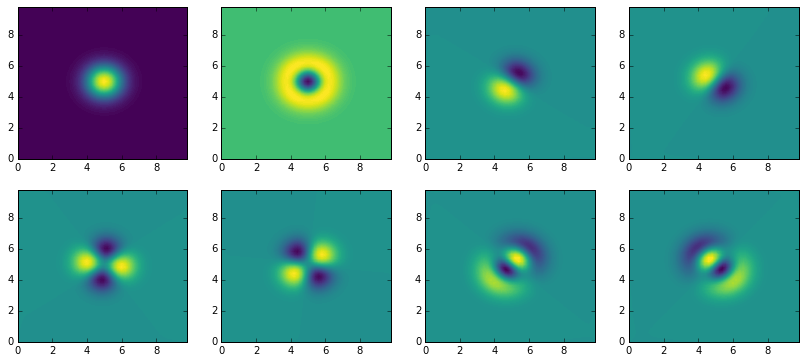

In [9]:
fig, axs = plt.subplots(2,4, figsize=(14, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()

for ii in xrange(8):
    psi = ham2d.psi_list[ii]
    axs[ii].contourf(ham2d.xmesh, ham2d.ymesh, psi, 100, cmap='viridis')

### (4) Animate iterative improvement/evolution of the wavefunction.